In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

How does NYC do in comparison to other cities in the world? One might imagine that the recyling etc mustbe doing well in NYC. The data on the other hand says something very different. Below is statistics from around the world pointing at an important question: why is NYC's recylign so poor? 

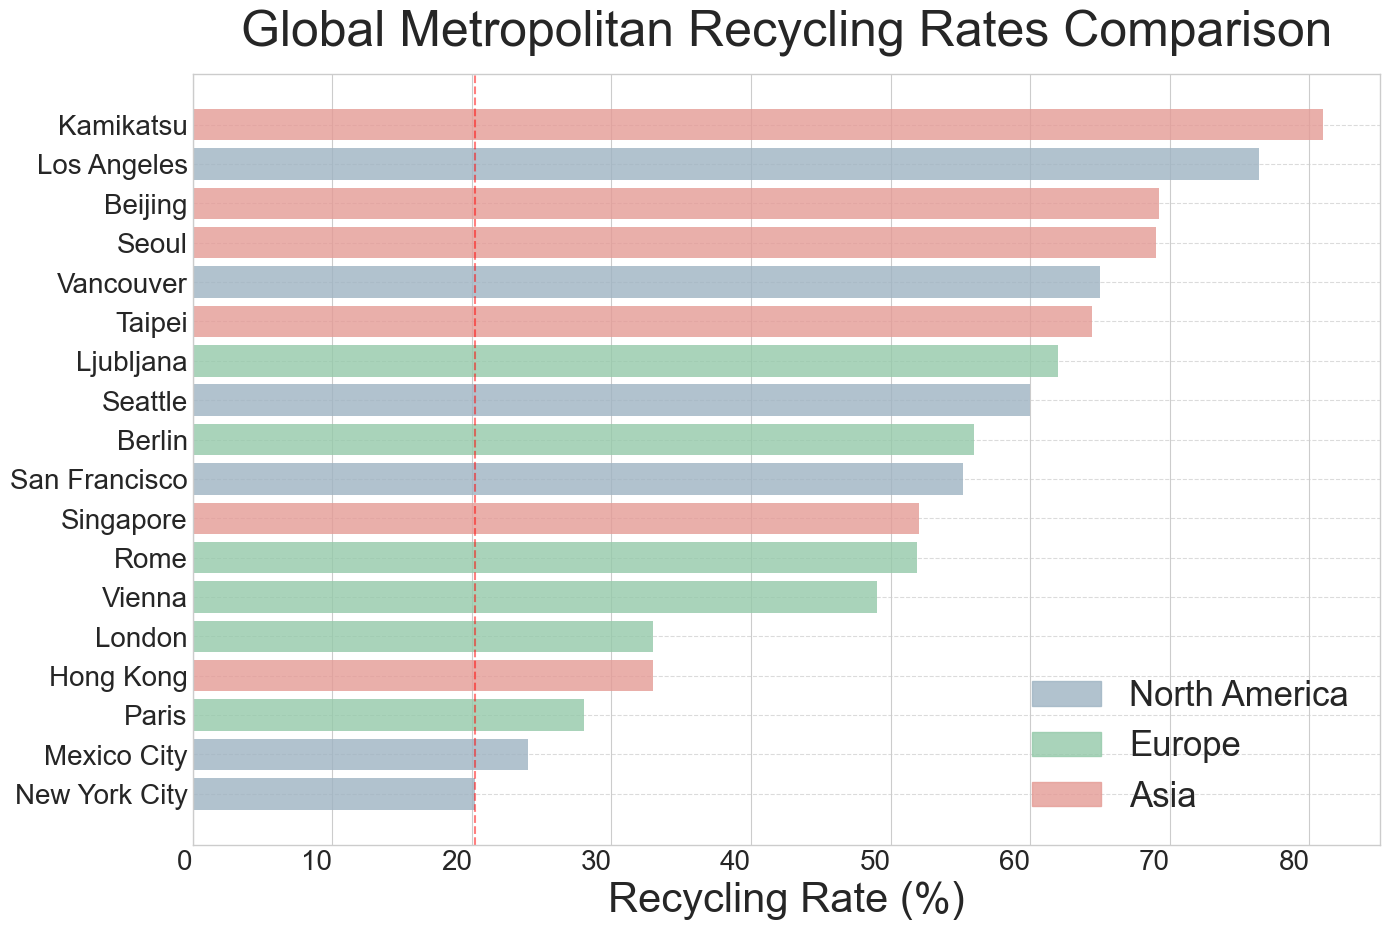

In [6]:
data = {
    'name': [
        'San Francisco', 'Seattle', 'Vancouver', 'Los Angeles', 'Mexico City', 'New York City',
        'Vienna', 'Berlin', 'Ljubljana', 'Rome', 'Paris', 'London',
        'Taipei', 'Singapore', 'Seoul', 'Kamikatsu', 'Beijing','Hong Kong'
    ],
    'rate': [
        55.2, 60, 65, 76.4, 24, 20.2,
        49, 56, 62, 51.9, 28, 33,
        64.42, 52, 69, 81, 69.2,33
    ],
    'region': [
        'North America', 'North America', 'North America', 'North America', 'North America', 'North America',
        'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
        'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort by recycling rate in descending order
df_sorted = df.sort_values(by='rate', ascending=True)

# Define colors for different regions
color_map = {
    'North America': '#9EB3C2',  # blue
    'Europe': '#94C9A9',         # sage green
    'Asia': '#E49B95'            # pink
}

# Apply colors to each bar based on region
colors = [color_map[region] for region in df_sorted['region']]

# Create the figure and axis
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)

# Create the bar chart
bars = plt.barh(df_sorted['name'], df_sorted['rate'], color=colors, alpha=0.8)

# Set chart title and labels
plt.title('Global Metropolitan Recycling Rates Comparison', fontsize=36, pad=20)
plt.xlabel('Recycling Rate (%)', fontsize=30)
plt.xticks(ha='right',fontsize=20)
plt.yticks(ha='right',fontsize=20)


# Add a thin grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create legend for regions
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color, alpha=0.8) 
                  for color in color_map.values()]
ax.legend(legend_elements, color_map.keys(), loc='lower right',fontsize=25)

# Add a horizontal line for NYC's rate for emphasis
nyc_rate = df[df['name'] == 'New York City']['rate'].values[0]
plt.axvline(x=nyc_rate, color='red', linestyle='--', alpha=0.5)
#plt.text(0, nyc_rate + 1, f'NYC Rate: {nyc_rate}%', color='red')

# Add data source note
source_text = (
    "Data Sources: SF Environment Department (2019), NYC Department of Sanitation (2022), "
    "Seattle/Portland city reports (2021), European Environment Agency (2023), "
    "Japan Ministry of Environment, Singapore NEA, Seoul Metropolitan Government (2022), "
    "Kamikatsu Zero Waste Academy (2021)"
)
#plt.figtext(0.5, 0.01, source_text, ha='center', fontsize=8, wrap=True)

# Adjust layout to make room for labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Add space for the source text

# Save the figure
plt.savefig('global_recycling_rates.png', dpi=300)

# Show the plot
plt.show()

To understand the problem at hand, we looked the 2023 waste chracterization study put out by the department of Sanitaiton NYC (https://www.nyc.gov/assets/dsny/downloads/resources/reports/waste-characterization-studies/2023/wcs-2023.pdf). Here are some key results plotted form that:

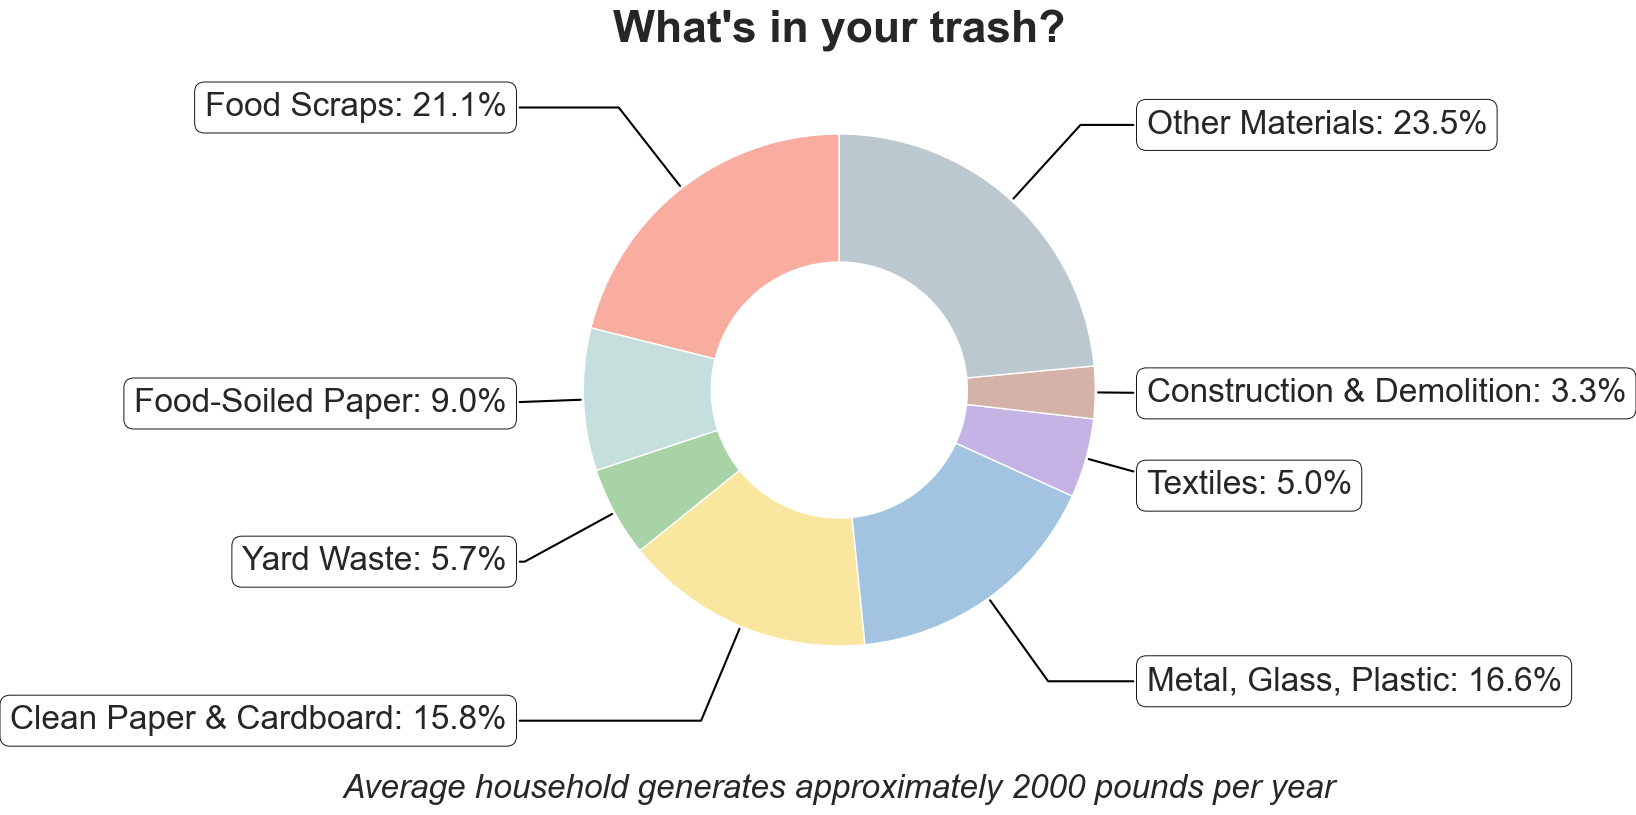

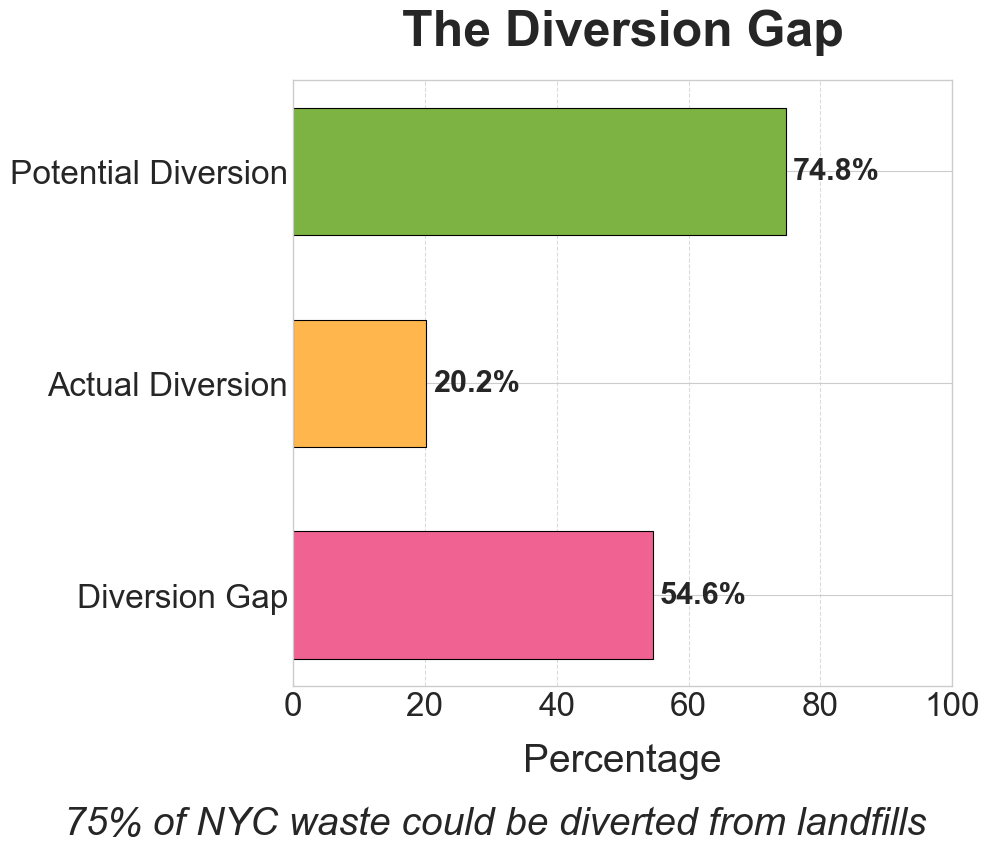

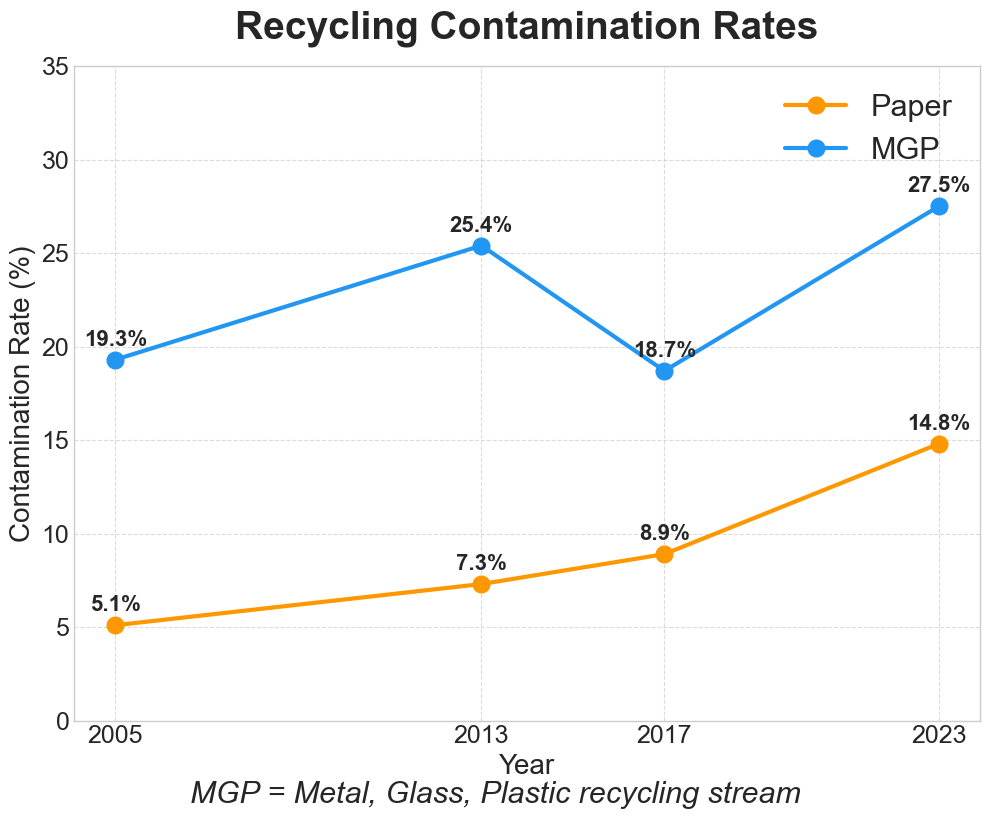

All plots have been generated!


In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure size that works well for all visualizations
figsize = (10, 8)


# 1. What's in NYC's Trash - Donut Chart
def plot_waste_composition():
    """Create a pie chart showing the composition of NYC's trash with external labels."""
    # Data for waste composition
    categories = [
        "Food Scraps", "Food-Soiled Paper", "Yard Waste", 
        "Clean Paper & Cardboard", "Metal, Glass, Plastic", 
        "Textiles", "Construction & Demolition", "Other Materials"
    ]
    values = [21.1, 9.0, 5.7, 15.8, 16.6, 5.0, 3.3, 23.5]
    
    # Updated with pastel colors
    colors = ['#F9ADA0', '#C5E0DC', '#A7D3A6', '#F9E79F', 
              '#A2C4E0', '#C5B3E6', '#D4B2A7', '#BCC8D0']
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create pie chart with external labels
    wedges, texts = ax.pie(
        values, 
        labels=None,
        colors=colors,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        startangle=90
    )
    
    # Add a circle in the center to create a donut chart (optional - remove if you want a regular pie)
    centre_circle = plt.Circle((0, 0), 0.25, fc='white')
    ax.add_patch(centre_circle)
    
    # Set aspect ratio to be equal so that pie is drawn as a circle
    ax.set_aspect('equal')
    
    # Draw lines and add labels with percentages
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72, alpha=0.9)
    kw = dict(arrowprops=dict(arrowstyle="-", color="k", lw=1.5),
              bbox=bbox_props, zorder=0, va="center")
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        # Adjust the connection point positions based on angle
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        
        # Determine horizontal alignment based on angle
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        
        # Calculate the length of the connecting line
        # Longer lines for a cleaner layout
        offset = 1.3 if 80 < ang < 290 else 1.2
        
        # Position text labels
        ax.annotate(f"{categories[i]}: {values[i]}%", 
                   xy=(x, y), 
                   xytext=(offset*np.sign(x), 1.4*y),
                   horizontalalignment=horizontalalignment,
                   fontsize=24, 
                   **kw)
    
    # Add title and adjust layout
    plt.title("What's in your trash?", fontsize=32, fontweight='bold', pad=20)
    plt.figtext(0.5, -0.01, "Average household generates approximately 2000 pounds per year", 
               ha="center", fontsize=24, style='italic')
    
    # Add more space around the plot for the external labels
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.show()

    return fig


# 2. The Diversion Gap - Bar Chart
def plot_diversion_gap():
    """Create a horizontal bar chart showing the diversion gap."""
    # Data for diversion gap
    categories = ["Potential Diversion", "Actual Diversion", "Diversion Gap"]
    values = [74.8, 20.2, 54.6]
    
    # Updated with pastel but visible colors
    colors = ['#7CB342', '#FFB74D', '#F06292']  # Pastel green, orange, pink
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create horizontal bar chart
    bars = ax.barh(categories, values, color=colors, height=0.6, edgecolor='black', linewidth=0.8)
    
    # Add data labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width}%', ha='left', va='center', fontweight='bold', fontsize=22)
    
    # Customize chart with increased font sizes
    ax.set_xlabel('Percentage', fontsize=28, labelpad=15)
    ax.set_xlim(0, 100)
    ax.invert_yaxis()  # To display categories from top to bottom
    
    # Increase tick label font size
    ax.tick_params(axis='both', which='major', labelsize=24)
    
    # Stronger grid lines
    ax.grid(True, linestyle='--', alpha=0.7, axis='x')
    
    # Add title and note with increased font sizes
    plt.title("The Diversion Gap", fontsize=36, fontweight='bold', pad=25)
    plt.figtext(0.5, -0.05, "75% of NYC waste could be diverted from landfills", 
               ha="center", fontsize=28, style='italic')
    
    plt.tight_layout()
    plt.savefig("diversion_gap.png",dpi=300,bbox_inches='tight')
    plt.show()
   
    return fig

# 4. Recycling Contamination Trends - Line Chart
def plot_contamination_trends():
    """Create a line chart showing recycling contamination trends over time."""
    # Data for contamination trends
    years = [2005, 2013, 2017, 2023]
    paper_contamination = [5.1, 7.3, 8.9, 14.8]
    mgp_contamination = [19.3, 25.4, 18.7, 27.5]
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot lines
    ax.plot(years, paper_contamination, 'o-', color='#FF9800', linewidth=3, markersize=12, label='Paper')
    ax.plot(years, mgp_contamination, 'o-', color='#2196F3', linewidth=3, markersize=12, label='MGP')
    
    # Add data labels with increased font size
    for i, (p_val, m_val) in enumerate(zip(paper_contamination, mgp_contamination)):
        ax.annotate(f'{p_val}%', (years[i], p_val), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=16, fontweight='bold')
        ax.annotate(f'{m_val}%', (years[i], m_val), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=16, fontweight='bold')
    
    # Customize chart
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Contamination Rate (%)', fontsize=20)
    
    # Set x-ticks properly (fixing the error in original code)
    ax.set_xticks(years)
    ax.set_xticklabels(years, fontsize=18)  # Set x-tick label size
    
    # Set y-tick label size
    ax.tick_params(axis='y', labelsize=18)
    
    ax.set_ylim(0, 35)
    ax.legend(fontsize=22)
    
    # Add grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add title and note
    plt.title("Recycling Contamination Rates", fontsize=28, fontweight='bold', pad=20)
    plt.figtext(0.5, -0.01, "MGP = Metal, Glass, Plastic recycling stream", 
               ha="center", fontsize=22, style='italic')
    
    plt.tight_layout()
    plt.show()
    return fig

# Create a main function that will save all plots
def generate_all_plots():
    """Generate and save all plots."""
    plots = [
        plot_waste_composition,
        plot_diversion_gap,
        plot_contamination_trends
    ]
    
    for plot_function in plots:
        fig = plot_function()
        plt.close(fig)
    
    print("All plots have been generated!")

# Uncomment to run all plots
generate_all_plots()


We got interested in what contamination is. Turns out, contamination rate measures the percent of non-recyclable materials that are improperly disposed of in a recycling stream. High contamination rates are detrimental to recycling systems. Although modern recycling facilities can sort out contamination from recyclables, large amounts of contaminants increase costs, reduce operational efficiency, and may reduce the post-processing market value of recycled materials.

We wanted to learn what is causing contamination in Paper vs metal glass and plastics 


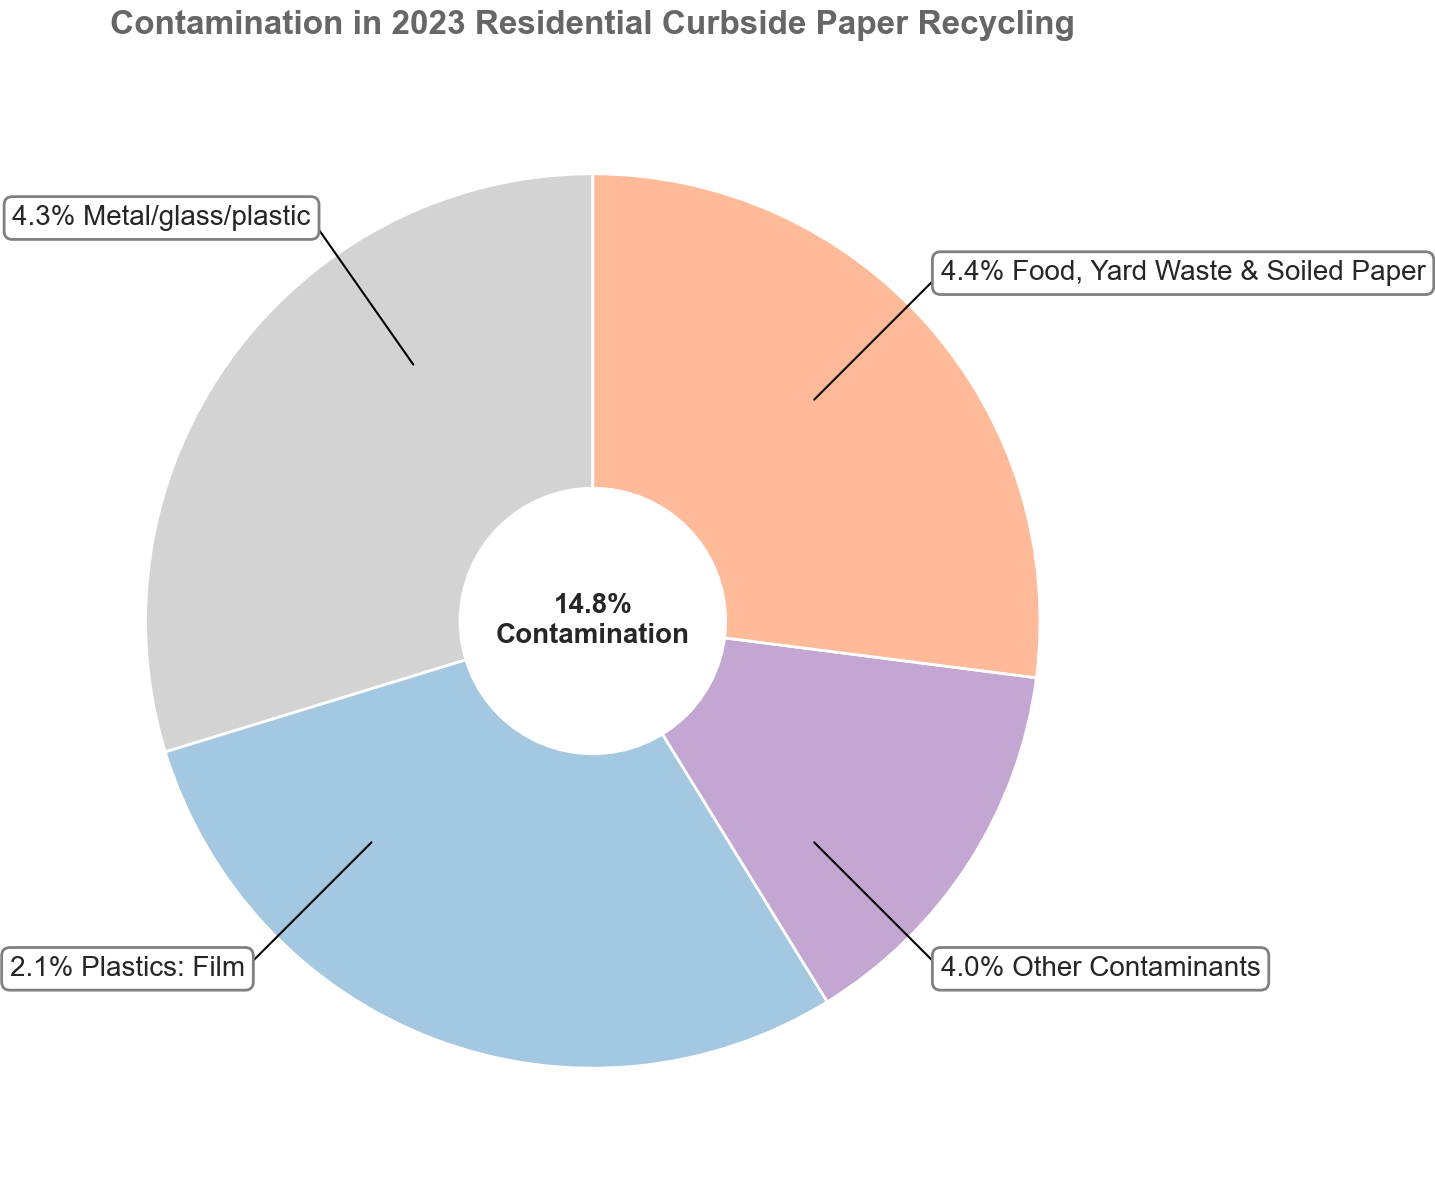

In [87]:
# Data for contamination types
contamination_types = [
    'Food, Yard Waste & Soiled Paper',
    'Metal/glass/plastic',
    'Plastics: Film',
    'Other Contaminants'
]
contamination_values = [4.4, 4.3, 2.1, 4.0]

# Pastel versions of the original colors
contamination_colors = [
    '#D3D3D3',  # Light gray for Food Waste
    '#A4C8E1',  # Pastel blue for MGP
    '#C3A6D1',  # Pastel purple for Plastics
    '#FFBB99',  # Pastel orange for Other
]

# Create figure with larger size
fig, ax = plt.subplots(figsize=(15, 12))

# Create pie chart for contamination only - with explicit wedge positions
wedges, _ = ax.pie(
    contamination_values,
    colors=contamination_colors,
    startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    counterclock=True
)

# Add center circle to create donut
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
ax.add_patch(centre_circle)

# Set equal aspect ratio
ax.set_aspect('equal')

# Add title with larger font
plt.title('Contamination in 2023 Residential Curbside Paper Recycling', 
          fontsize=24, fontweight='bold', color='#666666', pad=20)

# Define explicit positions for each label - with careful positioning
# Format: (theta in degrees, radius multiplier, label text)
label_positions = [
    (45, 1.1, f"{contamination_values[0]}% {contamination_types[0]}"),  # Food Waste
    (125, 1.1, f"{contamination_values[1]}% {contamination_types[1]}"),  # MGP
    (225, 1.1, f"{contamination_values[2]}% {contamination_types[2]}"),  # Plastics
    (315, 1.1, f"{contamination_values[3]}% {contamination_types[3]}")   # Other
]

# Create straight lines and labels with explicit positioning
for i, (theta, radius, label_text) in enumerate(label_positions):
    # Convert angle to radians for trigonometry
    theta_rad = np.radians(theta)
    
    # Calculate start point (on the wedge)
    x_start = 0.7 * np.cos(theta_rad)
    y_start = 0.7 * np.sin(theta_rad)
    
    # Calculate end point (where line ends)
    x_end = radius * np.cos(theta_rad)
    y_end = radius * np.sin(theta_rad)
    
    # Draw the line
    line = ax.plot([x_start, x_end], [y_start, y_end], color='black', linewidth=1.5)
    
    # Determine text alignment based on position
    ha = 'left' if x_end > 0 else 'right'
    
    # Create label with white box
    label = ax.annotate(
        label_text,
        xy=(x_end, y_end),
        fontsize=20,
        ha=ha,
        va='center',
        bbox=dict(
            boxstyle="round,pad=0.3",
            fc="white",
            ec="gray",
            lw=2
        )
    )

# Add the total contamination percentage in the center
ax.text(0, 0, "14.8%\nContamination",
       ha='center', va='center', fontsize=20, fontweight='bold')

# Add subtitle
#plt.figtext(0.5, 0.02, "Of 2023 Residential Curbside Paper Recycling Collections",
 #          ha='center', fontsize=16)

plt.tight_layout()
plt.savefig("paper_recycling_contamination_all_labeled.png", dpi=300, bbox_inches='tight')
plt.show()

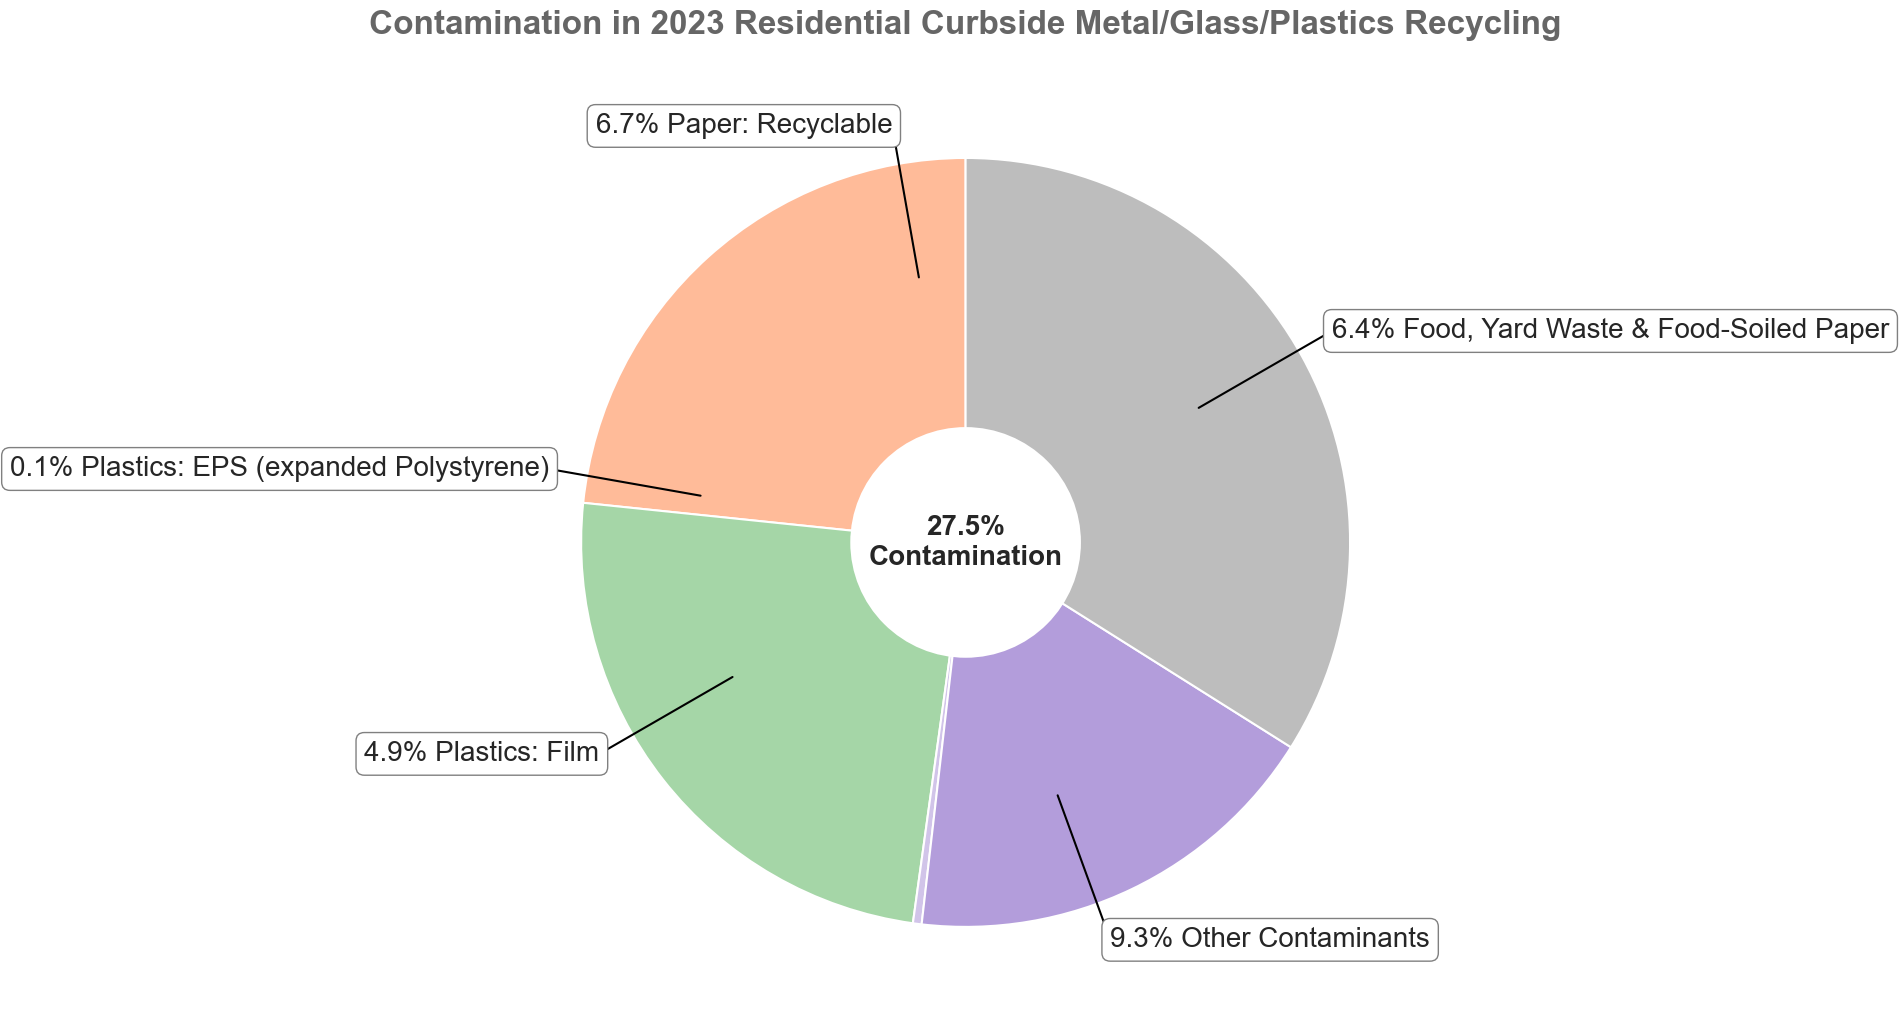

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Data for contamination types in MGP recycling
contamination_types = [
    'Food, Yard Waste & Food-Soiled Paper',
    'Paper: Recyclable',
    'Plastics: EPS (expanded Polystyrene)',
    'Plastics: Film',
    'Other Contaminants'
]
contamination_values = [6.4, 6.7, 0.1, 4.9, 9.3]

# Pastel versions of the original colors
contamination_colors = [
    '#FFBB99',  # Pastel orange for Food Waste
    '#A5D6A7',  # Pastel green for Paper
    '#D1C4E9',  # Pastel purple for EPS
    '#B39DDB',  # Light pastel purple for Plastic Film
    '#BDBDBD'   # Light gray for Other
]

# Calculate total contamination
total_contamination = sum(contamination_values)

# Create figure with larger size
fig, ax = plt.subplots(figsize=(16, 12))

# Create pie chart for contamination only
wedges, _ = ax.pie(
    contamination_values,
    colors=contamination_colors,
    startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    shadow=False
)

# Add center circle to create donut
centre_circle = plt.Circle((0, 0), 0.3, fc='white')
ax.add_patch(centre_circle)

# Set equal aspect ratio
ax.set_aspect('equal')

# Add title with larger font
plt.title('Contamination in 2023 Residential Curbside Metal/Glass/Plastics Recycling', 
          fontsize=24, fontweight='bold', color='#666666', pad=20)

# Define explicit positions for each label - with careful positioning
# Format: (theta in degrees, radius multiplier, label text)
label_positions = [
    (30, 1.1, f"{contamination_values[0]}% {contamination_types[0]}"),     # Food Waste
    (100, 1.1, f"{contamination_values[1]}% {contamination_types[1]}"),    # Paper
    (170, 1.1, f"{contamination_values[2]}% {contamination_types[2]}"),    # EPS
    (210, 1.1, f"{contamination_values[3]}% {contamination_types[3]}"),    # Film
    (290, 1.1, f"{contamination_values[4]}% {contamination_types[4]}")     # Other
]

# Create straight lines and labels with explicit positioning
for i, (theta, radius, label_text) in enumerate(label_positions):
    # Convert angle to radians for trigonometry
    theta_rad = np.radians(theta)
    
    # Calculate start point (on the wedge)
    x_start = 0.7 * np.cos(theta_rad)
    y_start = 0.7 * np.sin(theta_rad)
    
    # Calculate end point (where line ends)
    x_end = radius * np.cos(theta_rad)
    y_end = radius * np.sin(theta_rad)
    
    # Draw the line
    line = ax.plot([x_start, x_end], [y_start, y_end], color='black', linewidth=1.5)
    
    # Determine text alignment based on position
    ha = 'left' if x_end > 0 else 'right'
    
    # Create label with white box
    label = ax.annotate(
        label_text,
        xy=(x_end, y_end),
        fontsize=20,
        ha=ha,
        va='center',
        bbox=dict(
            boxstyle="round,pad=0.3",
            fc="white",
            ec="gray",
            lw=1
        )
    )

# Add the total contamination percentage in the center
ax.text(0, 0, "27.5%\nContamination",
       ha='center', va='center', fontsize=20, fontweight='bold')

# Add subtitle
#plt.figtext(0.5, 0.02, "Of 2023 Residential Curbside MGP Recycling Collections",
#           ha='center', fontsize=16)

plt.tight_layout()
plt.savefig("mgp_contamination_only.png", dpi=300, bbox_inches='tight')
plt.show()

This was enough to convice me that there is an interesting "trashy" story at hand that needs further investigaiton and so, in this github post, I will present some basic analysis I did to understand where NYC is at in terms of recyling and where is the city headed!